In [1]:
from SimPEG import Mesh, EM, np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append("../../util_codes/")
from View import DataView
import copy
from ipywidgets import *

/Applications/Anaconda/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#  Set-up DataView using EM analytic functions

In [2]:
#EM.Analytics.E_from_ElectricDipoleWholeSpace??

In [3]:
x = np.linspace(-100., 100., 200)
y = np.linspace(-100., 100., 200)
self = DataView()
srcLoc = np.r_[0., 0., 0.] # source location
sig, f = 1e-3, np.r_[1e1]  # conductivity (S/m), frequency (Hz)
self.set_xyz(x,y, np.r_[0.], normal="Z") # set plane and locations ... 
self.eval_2D(srcLoc, sig, f, "x", EM.Analytics.E_from_ElectricDipoleWholeSpace) # evaluate

In [4]:
sigvec = np.logspace(-2,9,200)
fvec = np.logspace(-5,8,200)
obsLoc=np.c_[1,1,0]
self.eval_loc(srcLoc,obsLoc, sigvec, fvec, "x", EM.Analytics.E_from_ElectricDipoleWholeSpace)

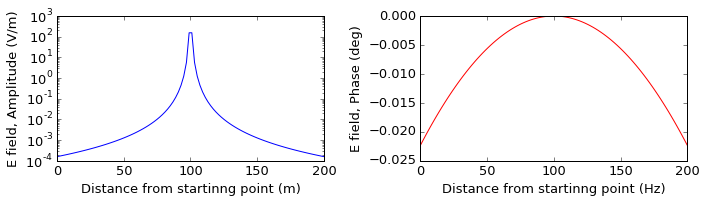

In [22]:
fig = plt.figure(figsize=(10,3))
ax0=plt.subplot(121)
ax1=plt.subplot(122)
start=np.r_[-100.,0.]
end=np.r_[100.,0.]
nbmp=100
ax0,ax1 = self.plot_1D_AP_section(start,end,nbmp,"x",ax0,ax1)
ax0.set_yscale("Log")
plt.tight_layout()

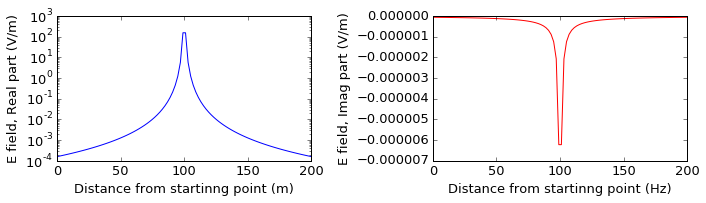

In [23]:
fig = plt.figure(figsize=(10,3))
ax0=plt.subplot(121)
ax1=plt.subplot(122)
start=np.r_[-100.,0.]
end=np.r_[100.,0.]
nbmp=100
ax0,ax1 = self.plot_1D_RI_section(start,end,nbmp,"x",ax0,ax1)
ax0.set_yscale("Log")
plt.tight_layout()

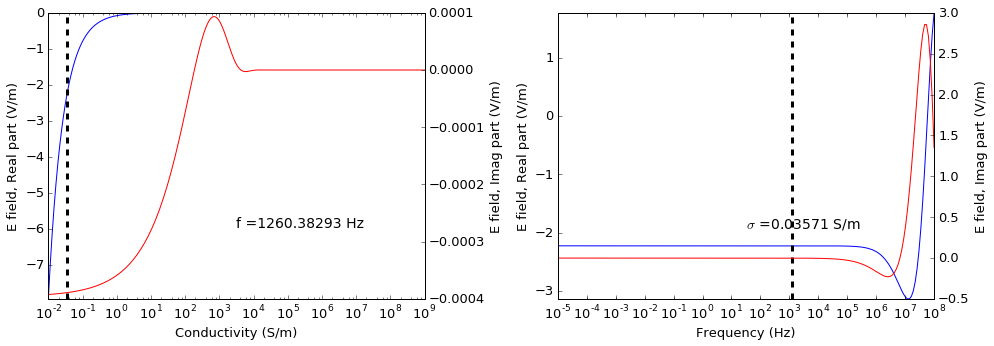

In [24]:
sigind = IntSlider(min=0, max =len(sigvec)-1, step=1,value=10)
freqind = IntSlider(min=0, max =len(fvec)-1, step=1,value=10)
obslocx = IntSlider(min=-100, max =100, step=1,value=0)
obslocy = IntSlider(min=-100, max =100, step=1,value=0)
obslocz = IntSlider(min=-100, max =100, step=1,value=1)
mode = ToggleButtons(options=['RI','AP'],value='RI')
interact(self.plot_1D_x,sigind=sigind,freqind=freqind,mode=mode,obslocx=obslocx,obslocy=obslocy,obslocz=obslocz)

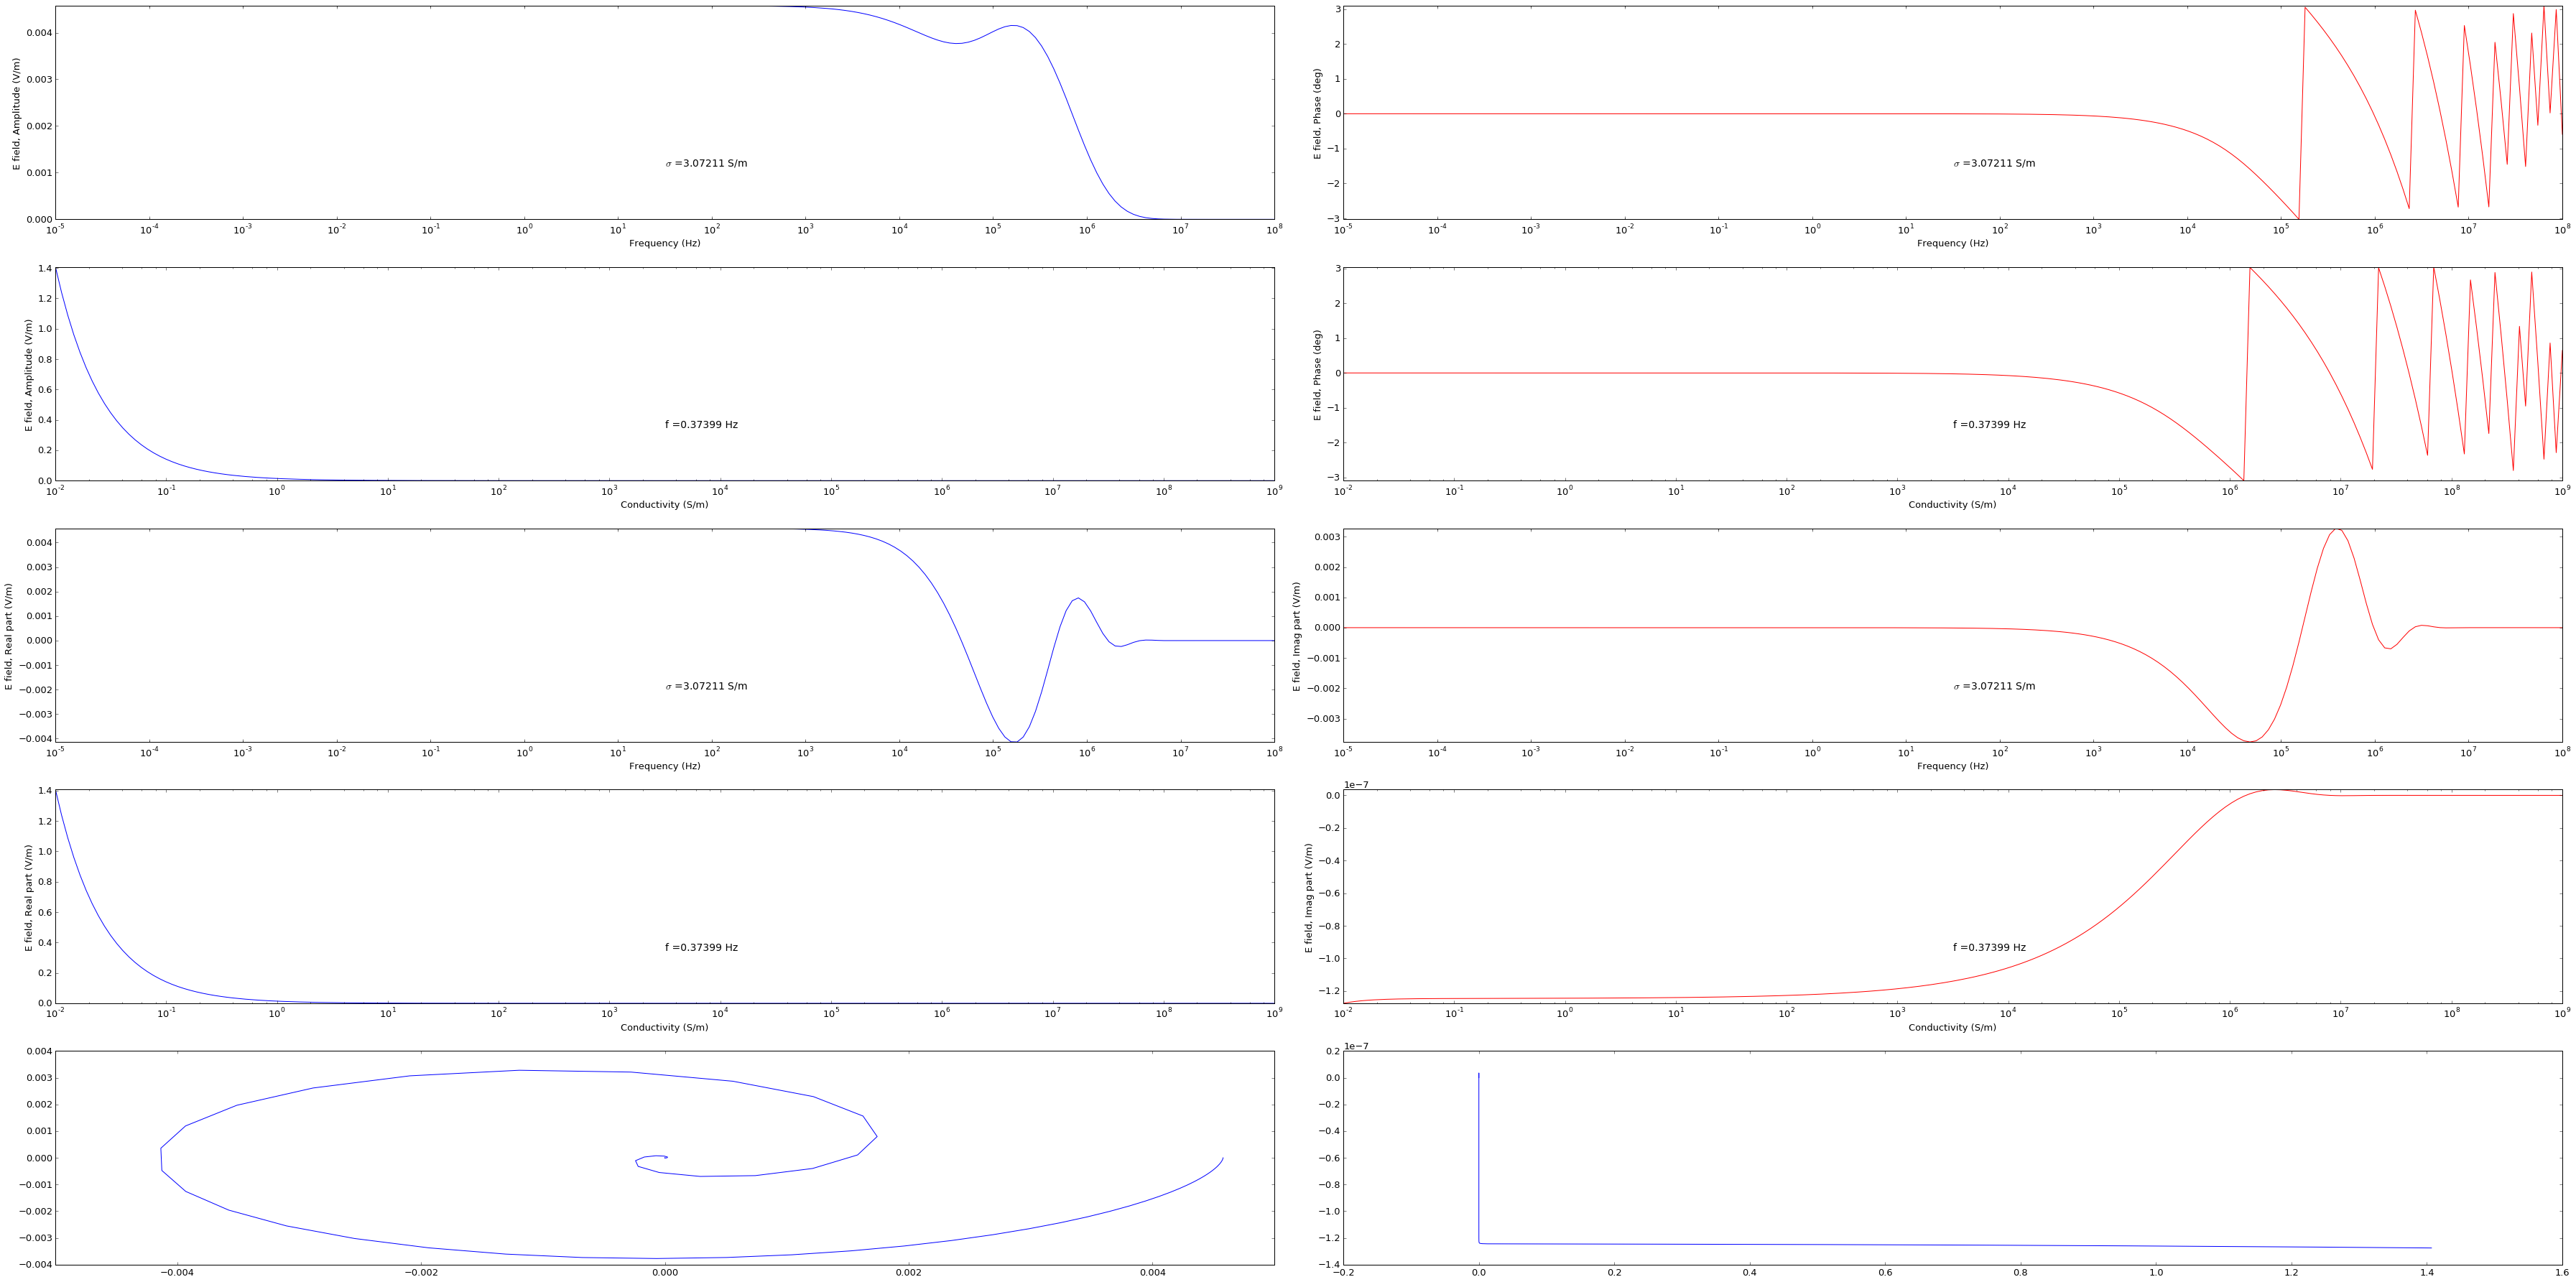

In [5]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

figfig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_x(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_x(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_x(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_x(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_x(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_x(absloc,coordloc,ax9,freqind)

plt.tight_layout()

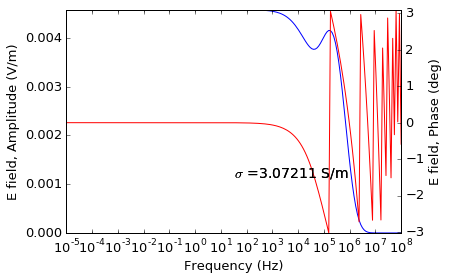

In [6]:
fig = plt.figure()
ax0 = plt.subplot(111)
ax1 = ax0.twinx()
ax0, ax1 = self.plot_1D_AP_f_x(absloc,coordloc,ax0,ax1,sigind)

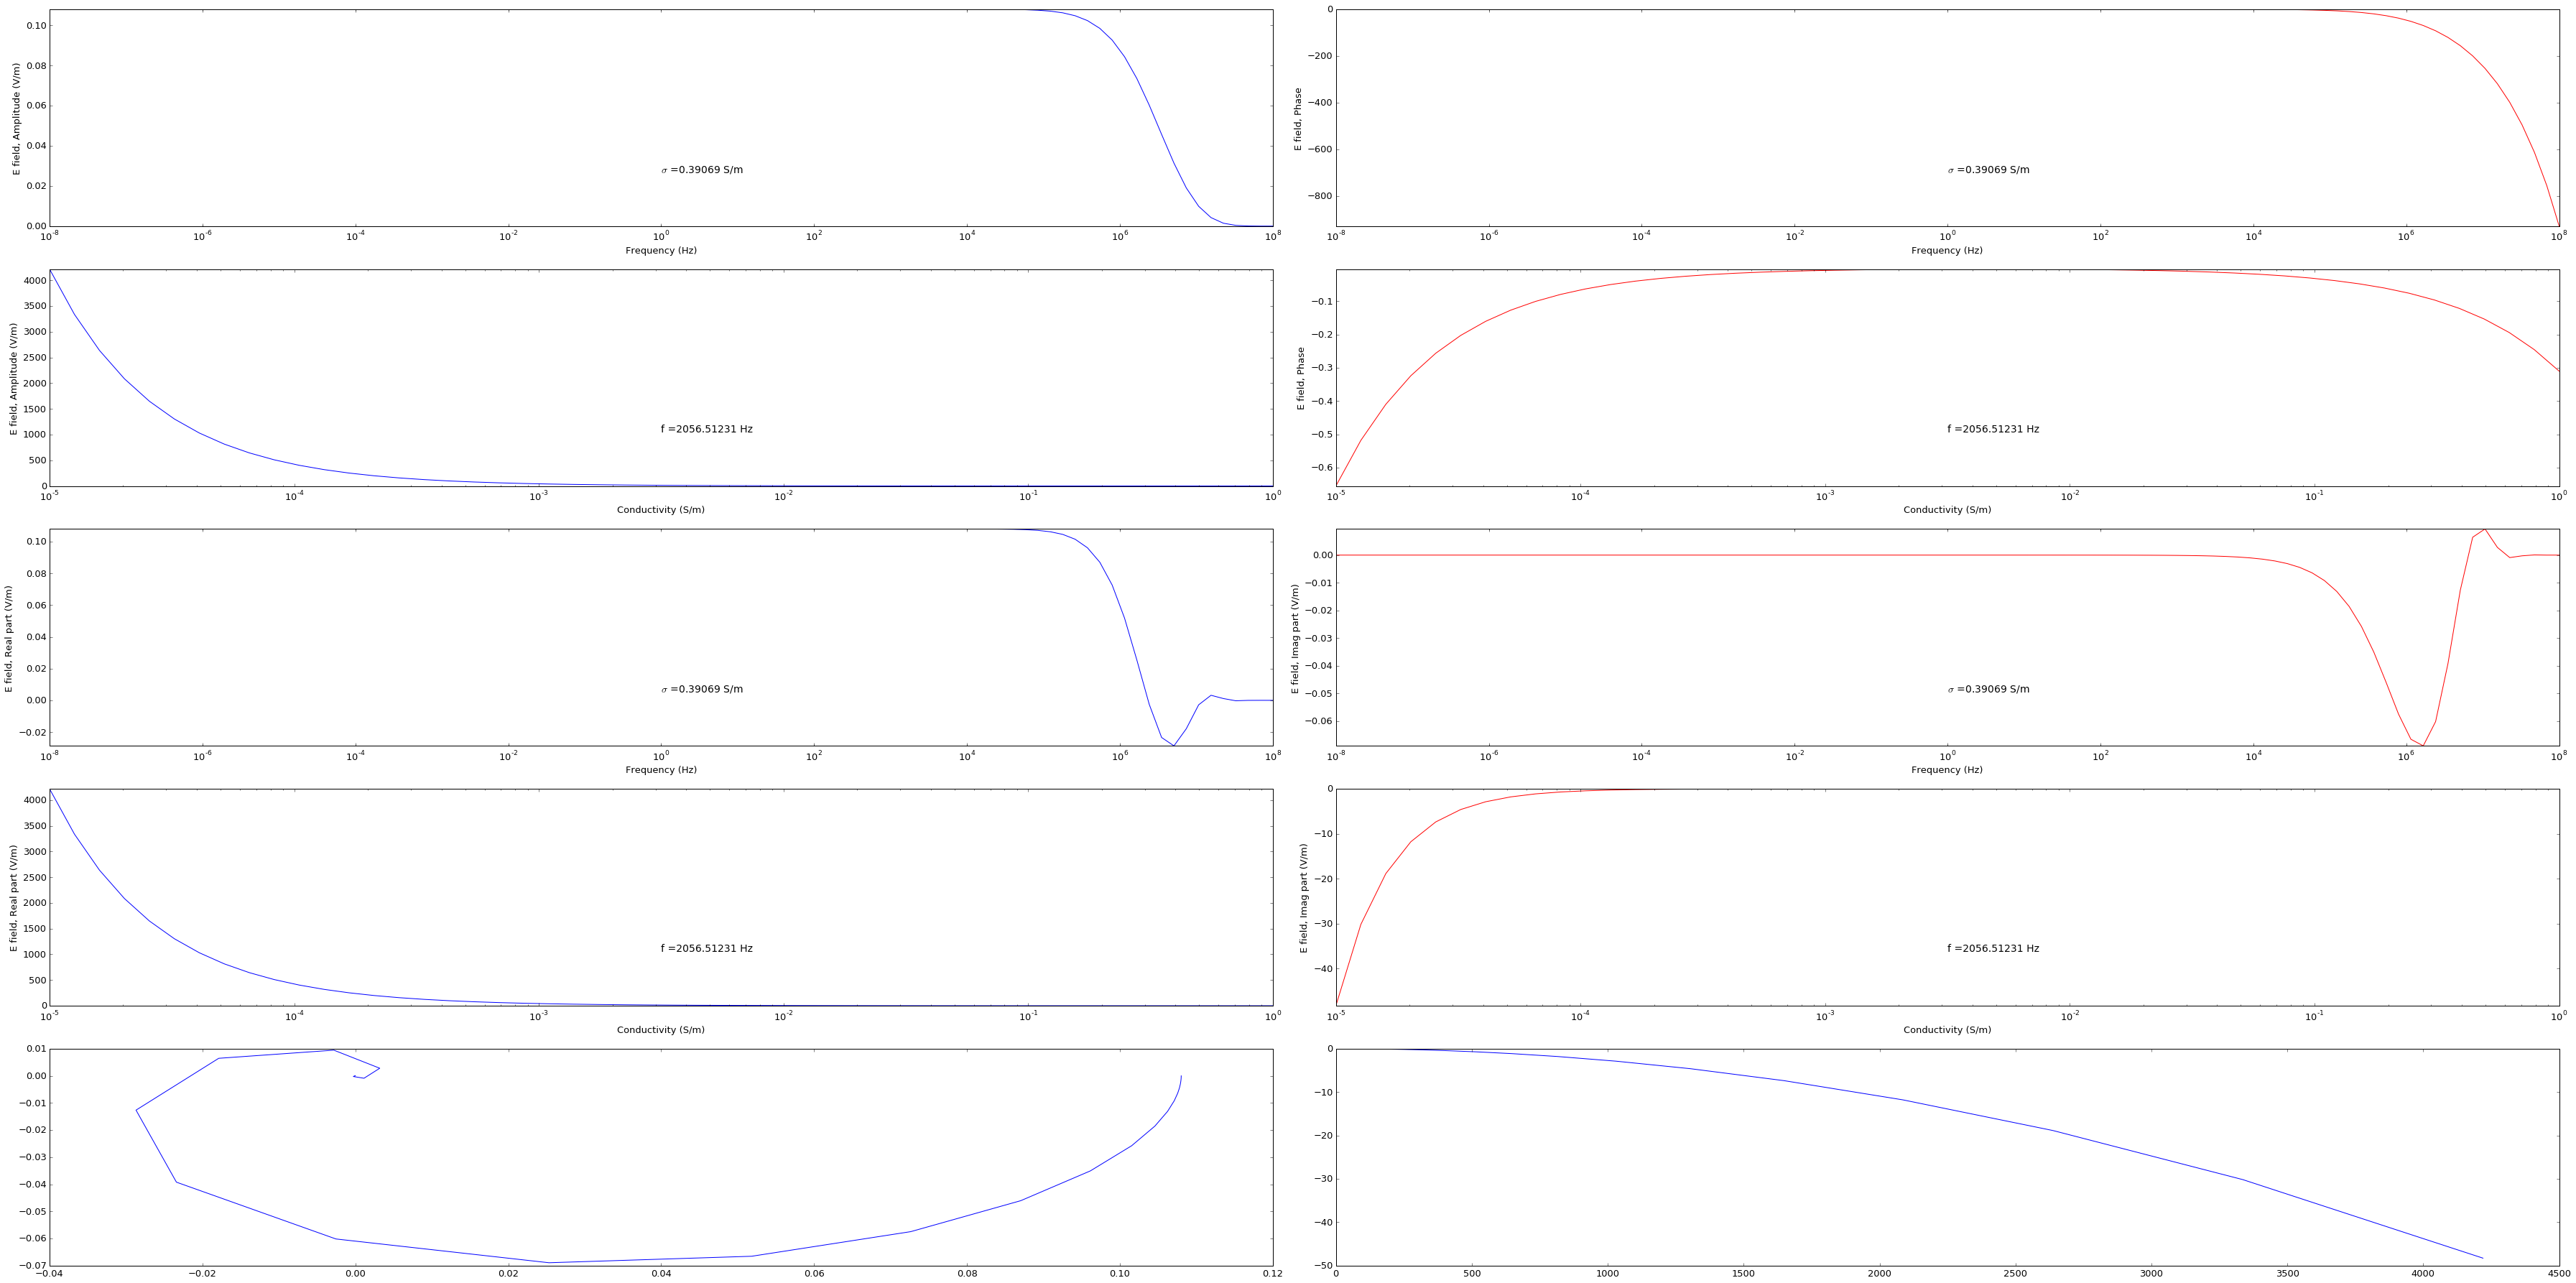

In [8]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

figfig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_y(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_y(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_y(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_y(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_y(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_y(absloc,coordloc,ax9,freqind)

plt.tight_layout()

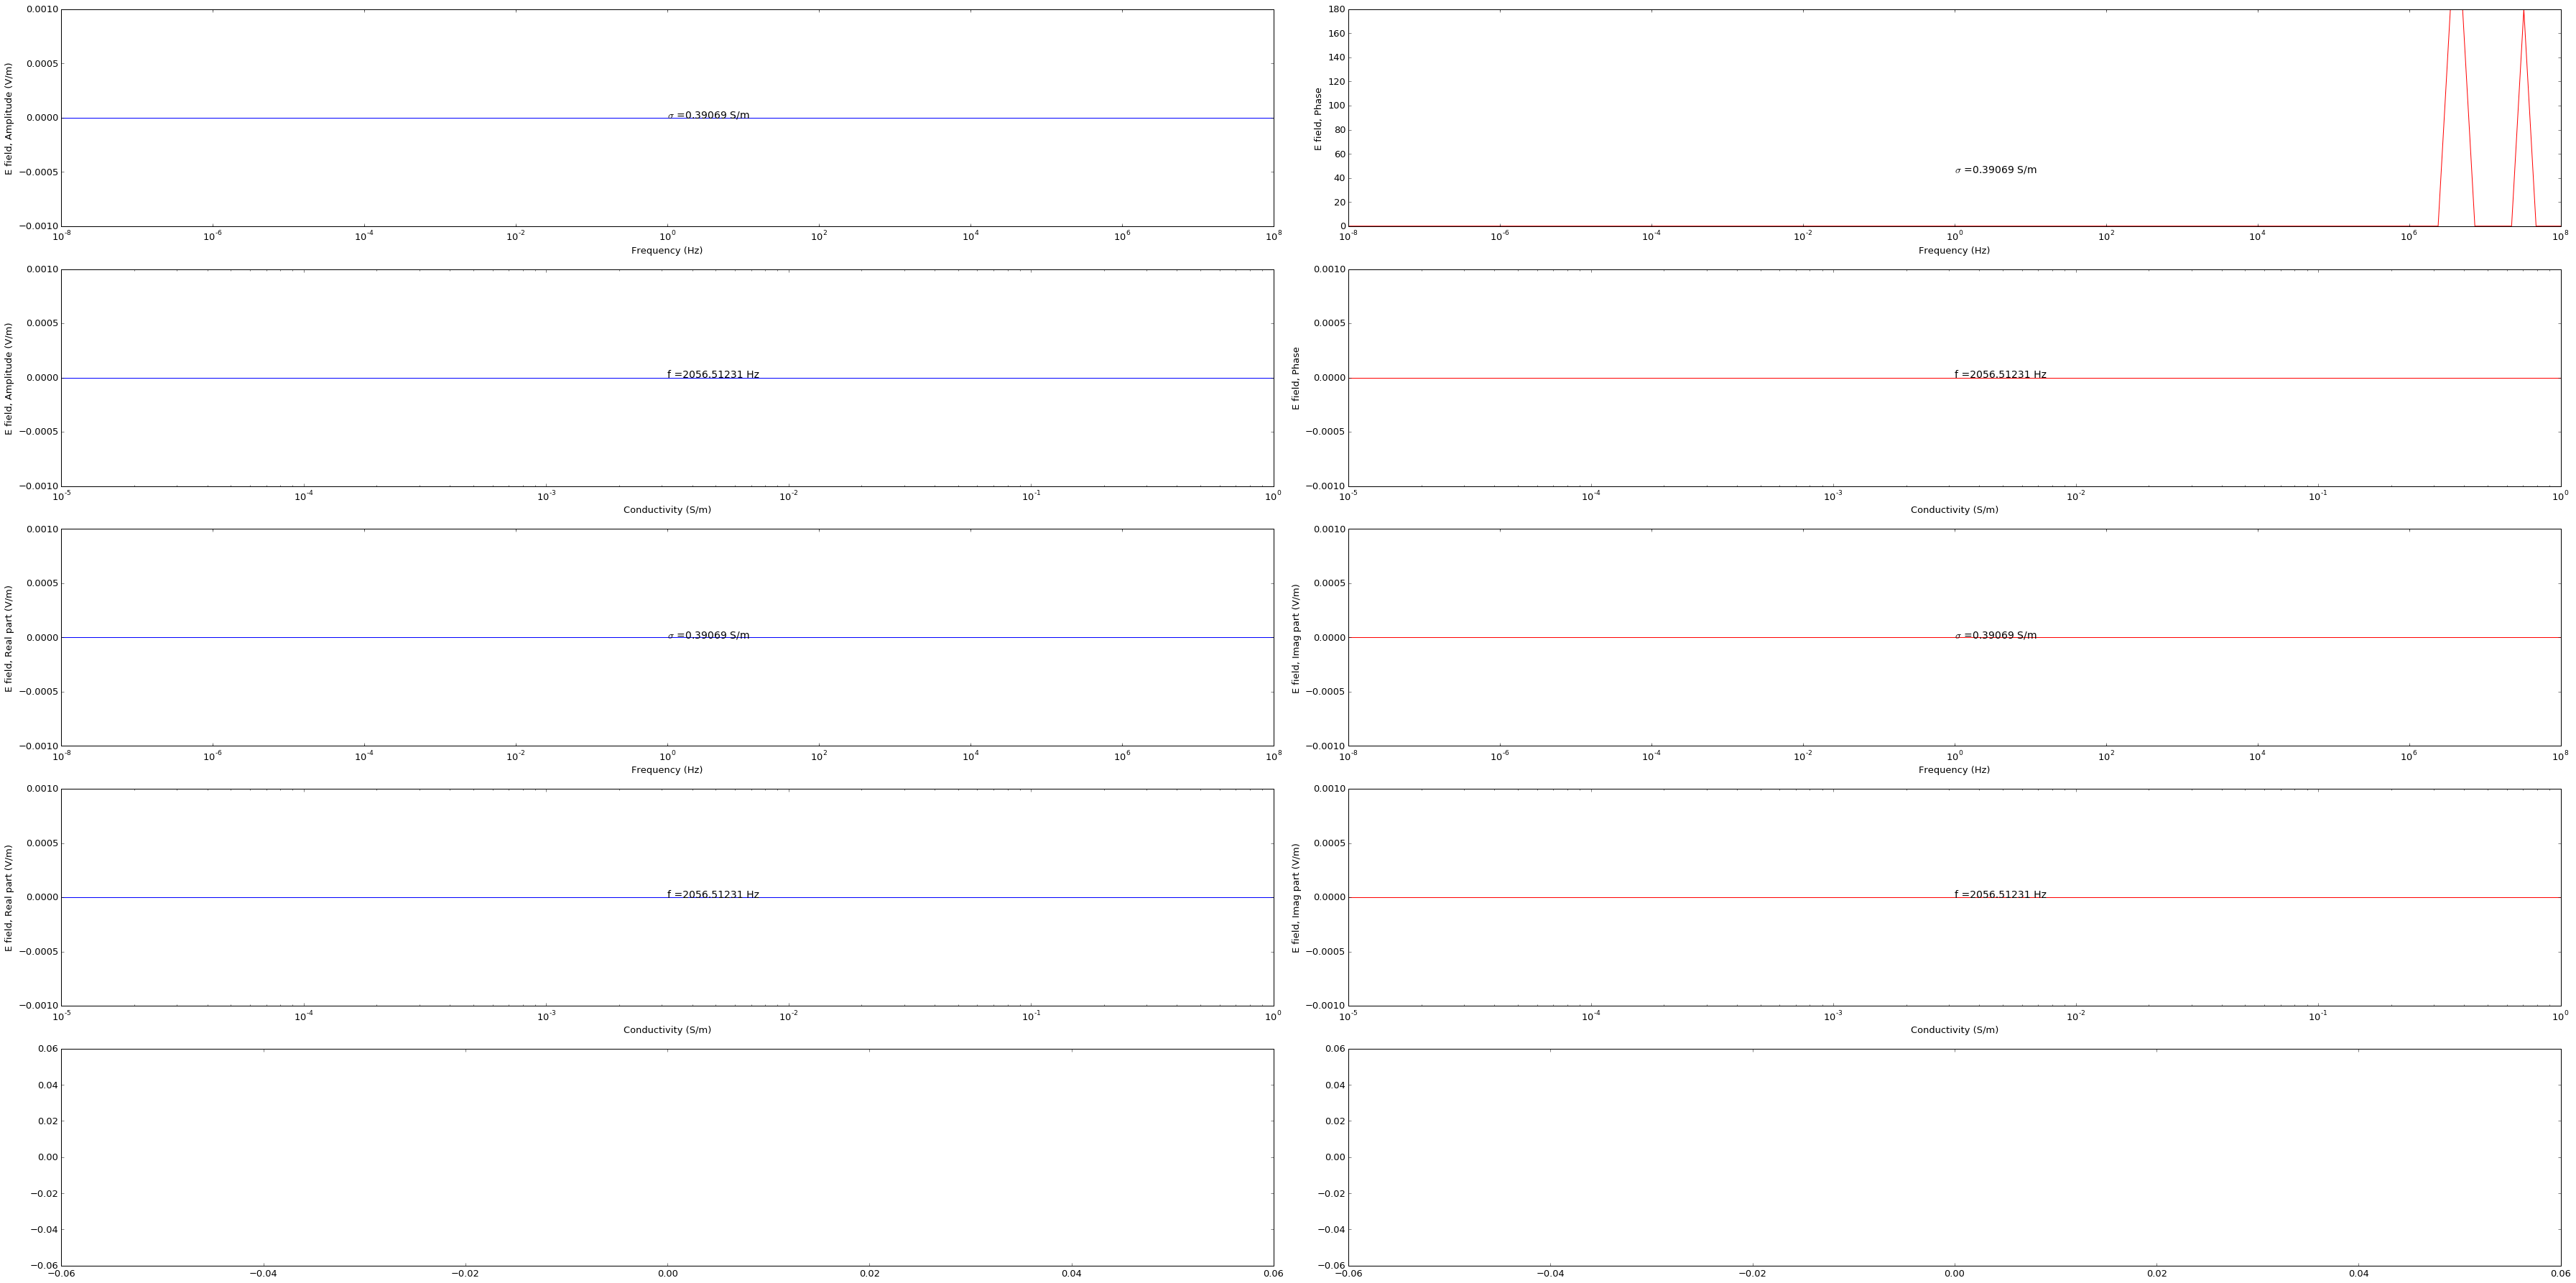

In [10]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

fig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_z(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_z(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_z(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_z(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_z(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_z(absloc,coordloc,ax9,freqind)

plt.tight_layout()

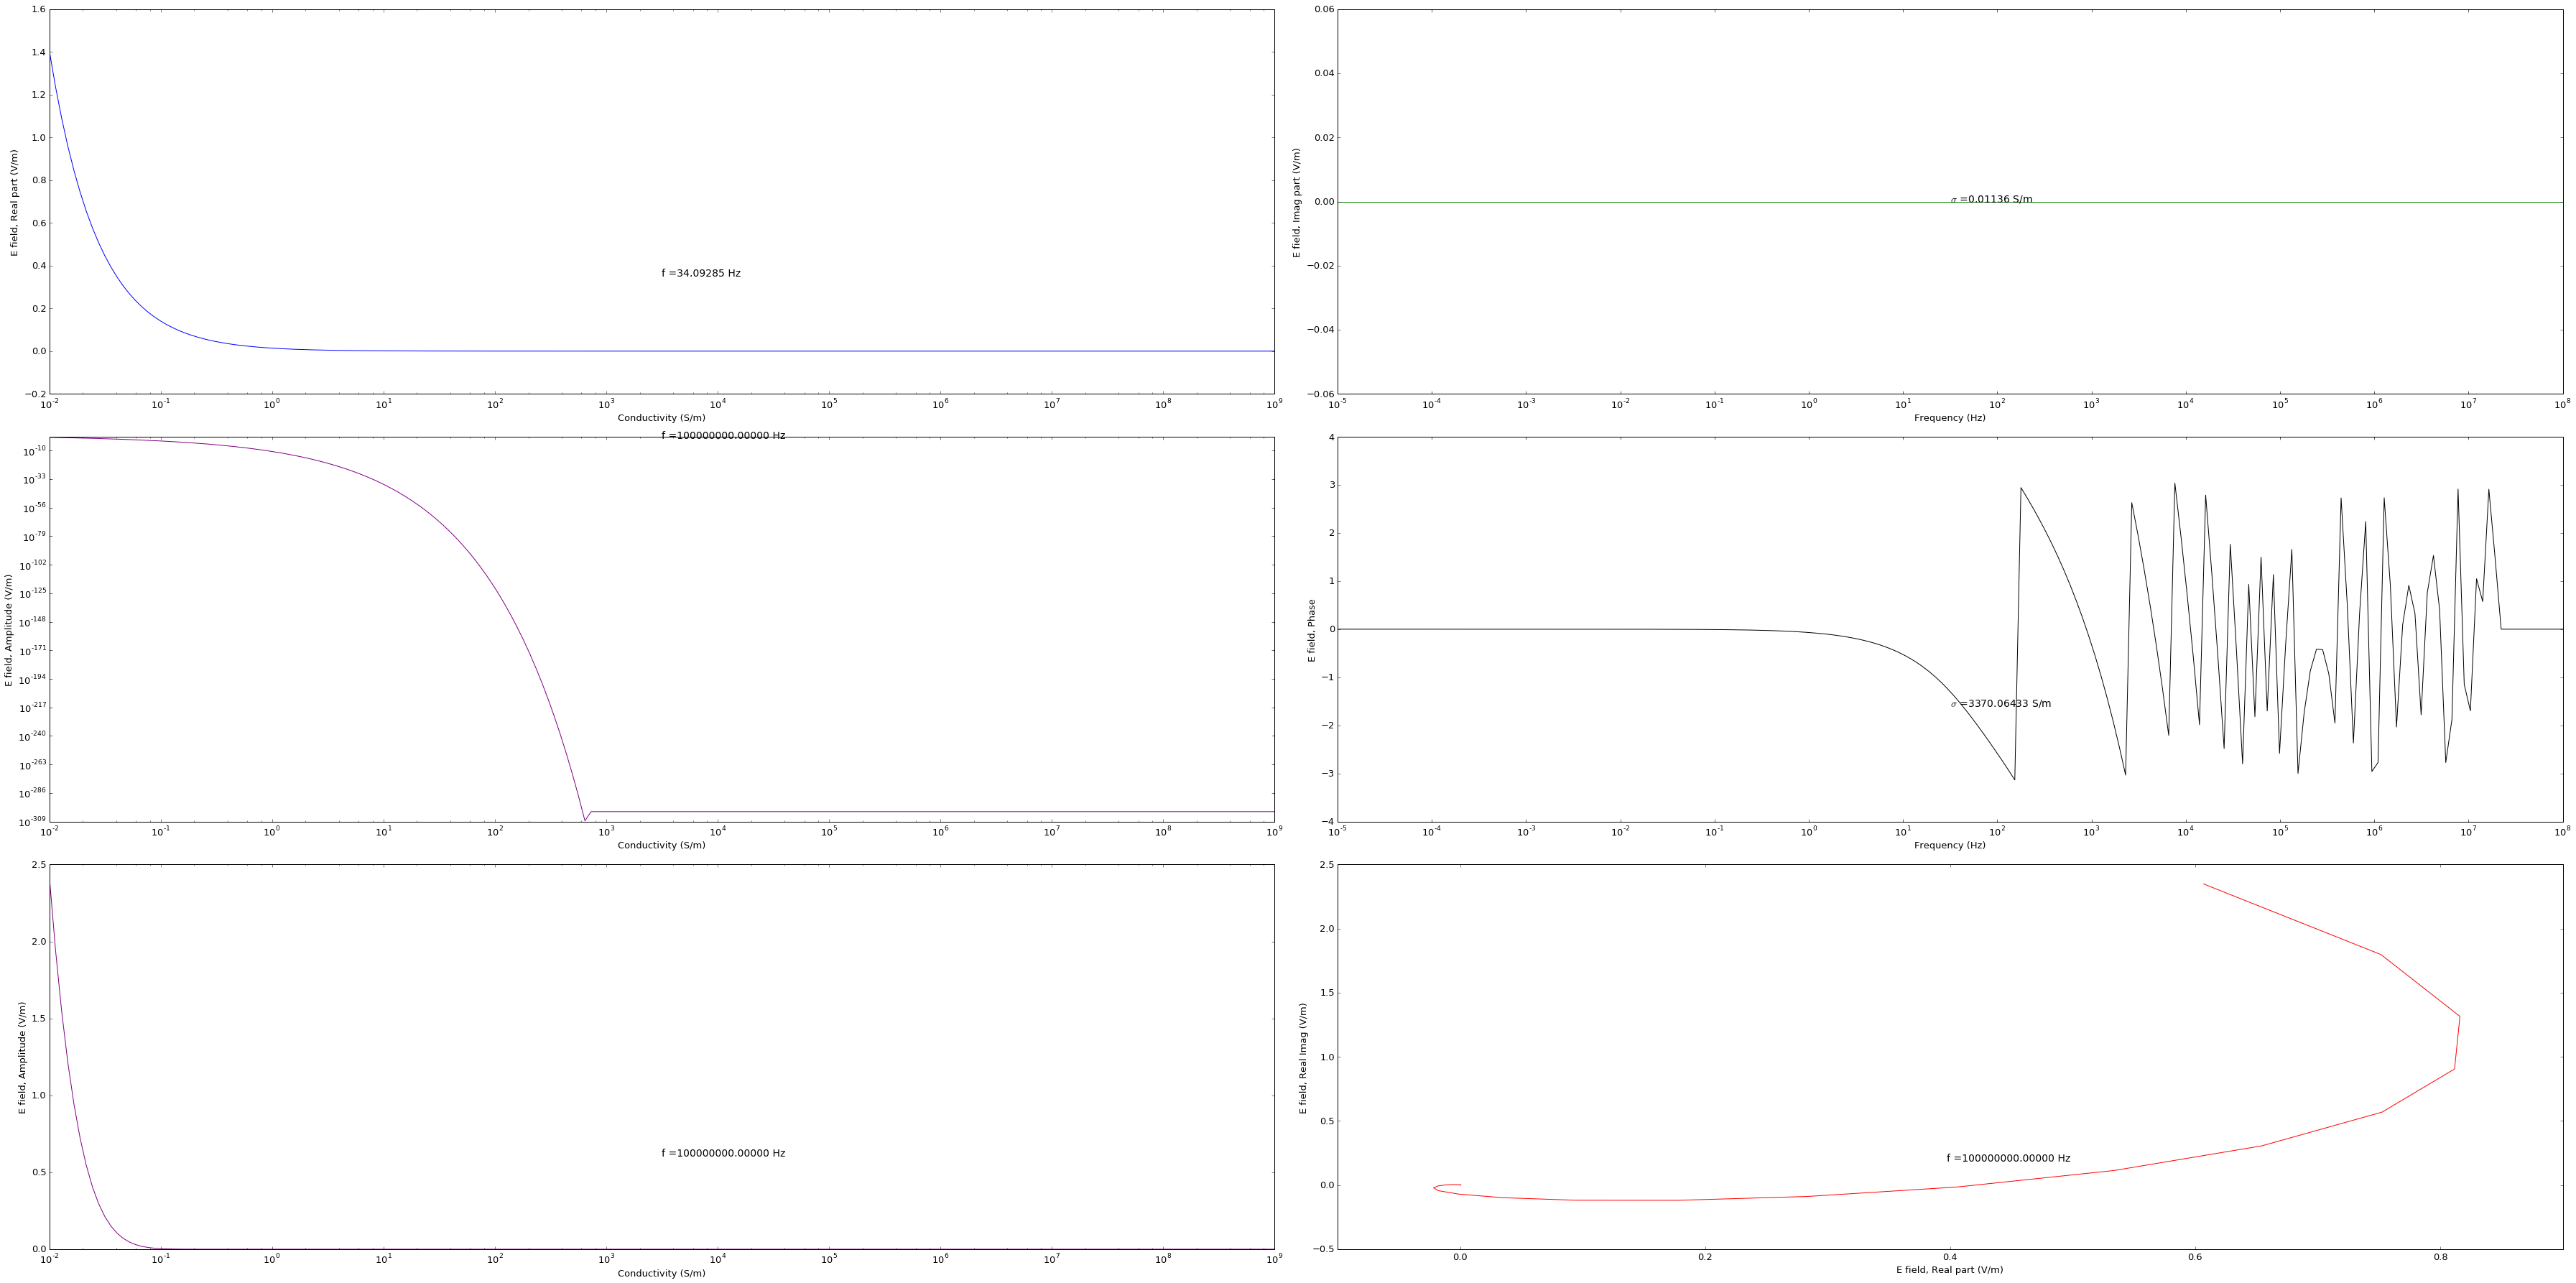

In [7]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

figfig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(321)
ax1 = plt.subplot(322)
ax2 = plt.subplot(323)
ax3 = plt.subplot(324)
ax4 = plt.subplot(325)
ax5 = plt.subplot(326)

ax0= self.plot1D_FD(component="real",view="x",abscisse="Conductivity",slice=None, logamp=True, ax=ax0, color = 'blue')
ax1=self.plot1D_FD(component="imag",view="z",abscisse="Frequency",slice=sigvec[1], logamp=True, ax=ax1, color = 'green')
ax2=self.plot1D_FD(component="Amplitude",view="y",abscisse="Conductivity",slice=fvec[-1], logamp=True, ax=ax2, color = 'purple')
ax3=self.plot1D_FD(component="Phase",view="x",abscisse="Frequency", ax=ax3)
ax4=self.plot1D_FD(component="Amplitude",view="x",abscisse="Conductivity",slice=fvec[-1], logamp=False, ax=ax4, color = 'purple')
ax5=self.plot1D_FD(component="Phasor",view="x",abscisse="Conductivity",slice=fvec[-1], logamp=False, ax=ax5, color = 'red')

plt.tight_layout()

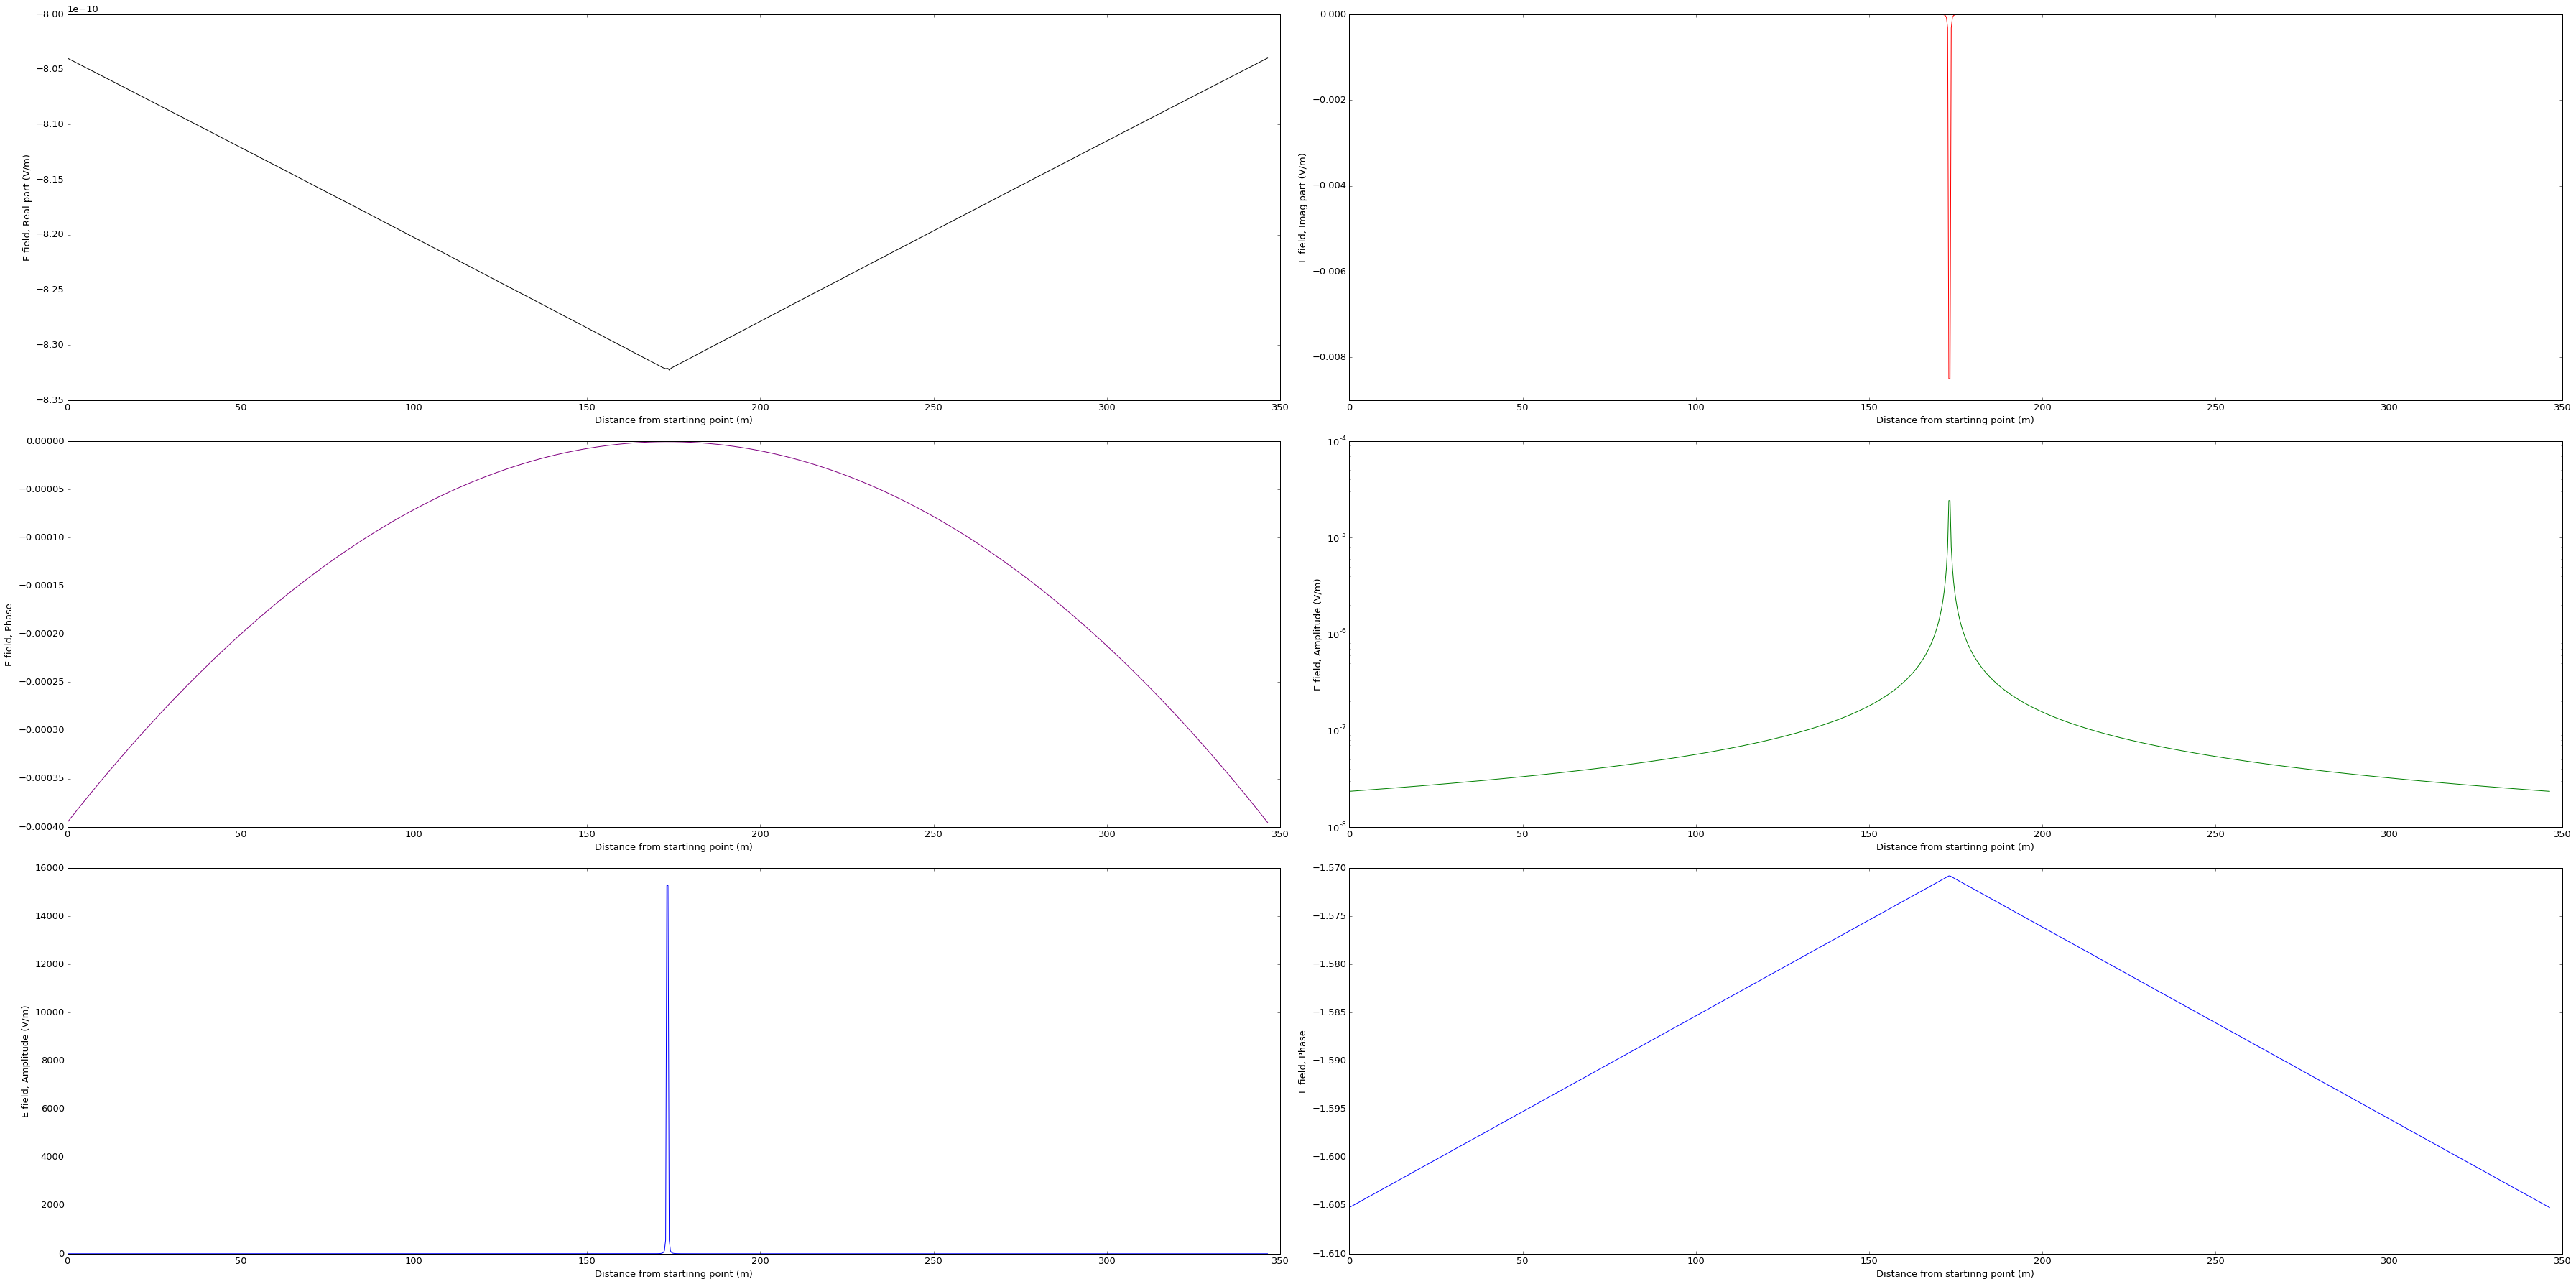

In [8]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

figfig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(321)
ax1 = plt.subplot(322)
ax2 = plt.subplot(323)
ax3 = plt.subplot(324)
ax4 = plt.subplot(325)
ax5 = plt.subplot(326)

ax0=self.plot_profile_FD(start=[-100,-100,-100],end=[100,100,100],nbmp=1000,component="real",view="x", logamp=True, ax=ax0, color="black")
ax1=self.plot_profile_FD(start=[-100,-100,-100],end=[100,100,100],nbmp=1000,component="imag",view="y", logamp=True, ax=ax1, color="red")
ax2=self.plot_profile_FD(start=[-100,-100,-100],end=[100,100,100],nbmp=1000,component="Phase",view="z", logamp=True, ax=ax2, color="purple")
ax3=self.plot_profile_FD(start=[-100,-100,-100],end=[100,100,100],nbmp=1000,component="Amplitude",view="x", logamp=True, ax=ax3, color="green")
ax4=self.plot_profile_FD(start=[-100,-100,-100],end=[100,100,100],nbmp=1000,component="Amplitude",view="y", logamp=False, ax=ax4, color="blue")
ax5=self.plot_profile_FD(start=[-100,-100,-100],end=[100,100,100],nbmp=1000,component="Phase",view="x", logamp=False, ax=ax5, color="blue")
plt.tight_layout()